<a href="https://colab.research.google.com/github/rochismandatta/Deep_Learning/blob/master/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.1MB/s 
     |████████████████████████████████| 194kB 25.7MB/s 
     |████████████████████████████████| 1.2MB 25.6MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
 ! pip install -q kaggle

In [ ]:
%cd /content/gdrive/My Drive/Kaggle
! kaggle datasets download -d prasadvpatil/mrl-dataset

/content/gdrive/My Drive/Kaggle
mrl-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \mrl-dataset.zip

Archive:  mrl-dataset.zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00018_0

In [ ]:
path = Path('/content/gdrive/My Drive/Kaggle/train')

In [ ]:
drowsy = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

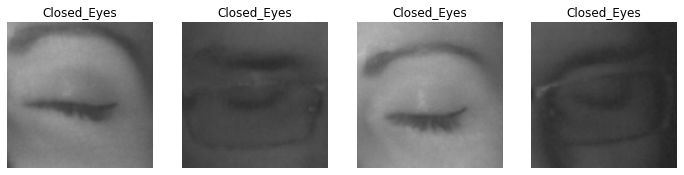

In [ ]:
dls = drowsy.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.166593,0.015338,0.005000,14:41


epoch,train_loss,valid_loss,error_rate,time
0,0.006091,0.000757,0.000000,00:17
1,0.002999,0.000408,0.000000,00:17
2,0.002074,0.000777,0.000000,00:17
3,0.001084,0.002999,0.001250,00:18


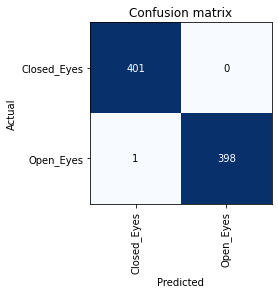

In [145]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [146]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [147]:
image = PILImage.create(btn_upload.data[-1])

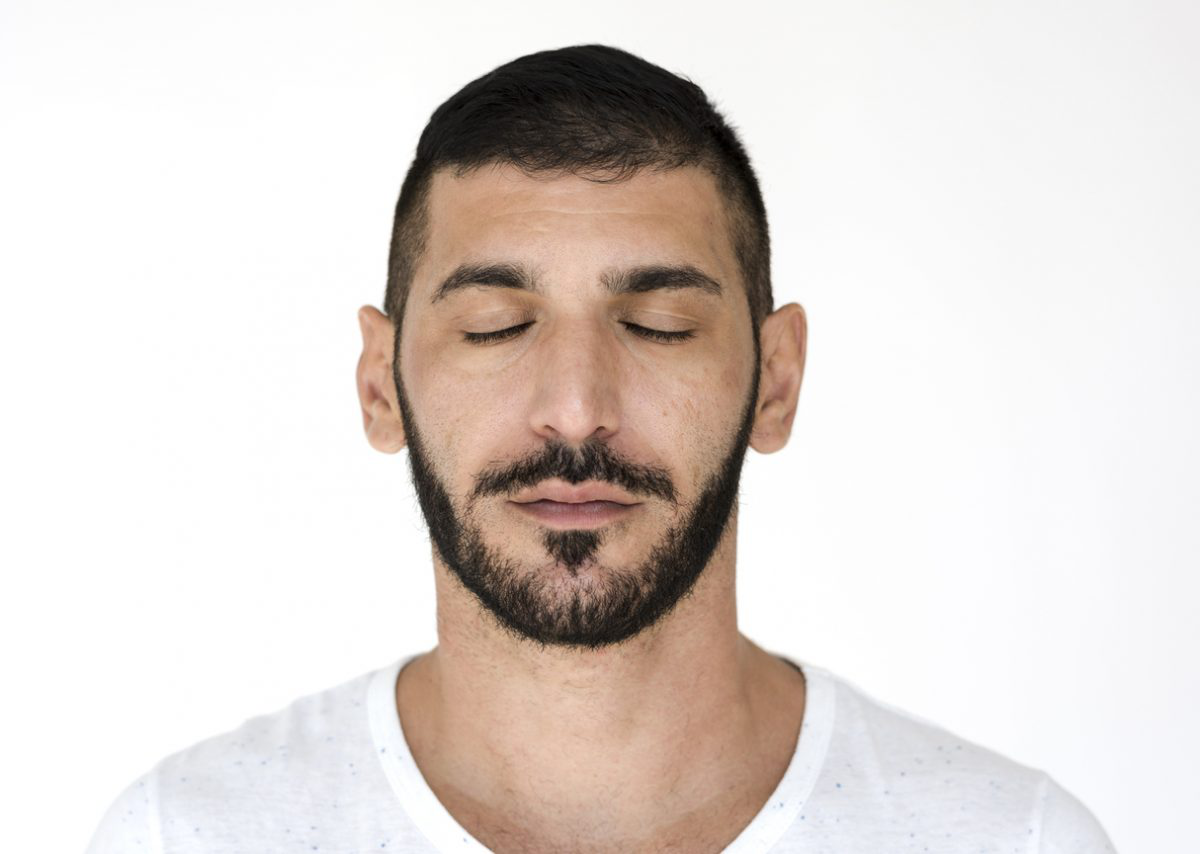

In [148]:
image

In [149]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(image.to_thumb(128,128))
out_pl

Output()

In [150]:
from google.colab.patches import cv2_imshow
#img = np.array(image)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)


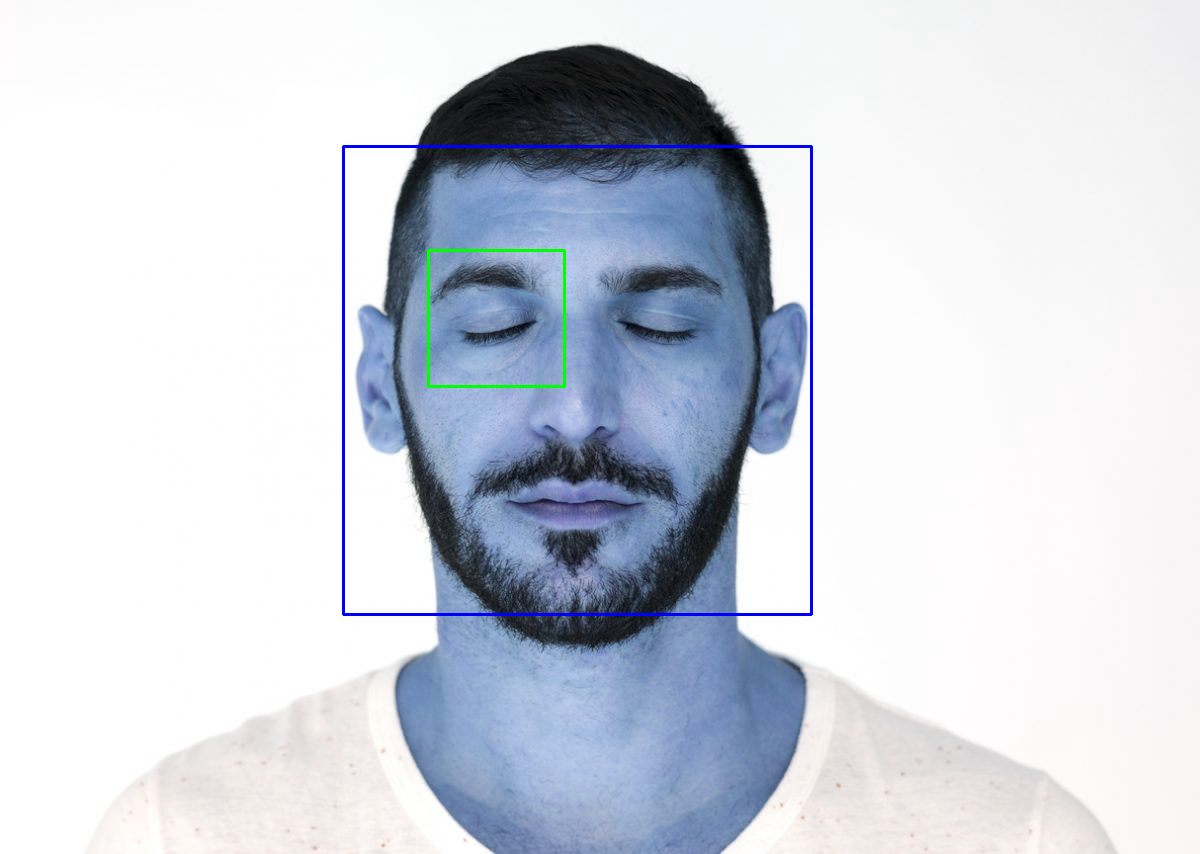

In [151]:
import numpy as np
import cv2

#face_cascade = cv2.CascadeClassifier("/root/opencv/data/haarcascades/haarcascade_frontalface_default.xml")
#eye_cascade = cv2.CascadeClassifier("/root/opencv/data/haarcascades/haarcascade_eye.xml")

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = np.array(image) 

#img = cv2.imread(image,1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(img)


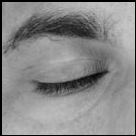

In [153]:
ex = eyes[0][0]
ey = eyes[0][1]
ew = eyes[0][2]
eh = eyes[0][3]
#cv2_imshow(roi_gray)
cv2_imshow(roi_gray[ey:ey+eh,ex:ex+ew])
#cv2_imshow(cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2))

In [154]:
#eyes

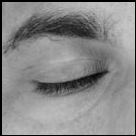

In [155]:
from matplotlib import cm
cropped=roi_gray[ey:ey+eh,ex:ex+ew]
cv2_imshow(cropped)
im = Image.fromarray(cropped)
im.save("eye123.png")

In [156]:
im2 = PILImage.create("eye123.png")

In [157]:
pred,pred_idx,probs = learn_inf.predict(im2)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Closed_Eyes; Probability: 0.9794')